In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import requests
from io import BytesIO


El conjunto de datos Fashion-MNIST es un conjunto de datos de imágenes de
artículos de Zalando, con imágenes en escala de grises de 28x28 de 70 000
productos de moda de 10 categorías y 7000 imágenes por categoría. El
conjunto de entrenamiento tiene 60.000 imágenes y el conjunto de prueba
tiene 10.000 imágenes. ¡Puede verificar esto más tarde cuando haya cargado
sus datos! 
Cargar los datos
Keras viene con una biblioteca llamada datasets, que puede usar para cargar
conjuntos de datos listos para usar: descarga los datos del servidor y acelera
el proceso, ya que ya no tiene que descargar los datos a su computadora. Las
imágenes del tren y de la prueba, junto con las etiquetas, se cargan y
almacenan en las variables train_X, train_Y, test_X, test_Y, respectivamente.

In [13]:
#pip install - -upgrade tensorflow
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
%matplotlib inline
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


1. Obtenga el tamaño de los datos de test y testeo, además de las dimensiones de las imágenes.

In [14]:
(train_images, train_labels), (test_images,
                            test_labels) = tf.keras.datasets.mnist.load_data()

# Obtener el tamaño de los datos de entrenamiento y prueba
train_size = len(train_images)
test_size = len(test_images)

print("Tamaño de los datos de entrenamiento:", train_size)
print("Tamaño de los datos de prueba:", test_size)

# Obtener las dimensiones de las imágenes
image_shape = train_images[0].shape

print("Dimensiones de las imágenes:", image_shape)


Tamaño de los datos de entrenamiento: 60000
Tamaño de los datos de prueba: 10000
Dimensiones de las imágenes: (28, 28)


2. Obtenga las categorías de la base

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress",
            "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Categorías de la base:", class_names)


Categorías de la base: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Aquí se define una lista de categorías que corresponden a las 10 clases presentes en el conjunto de datos Fashion-MNIST. Cada categoría se corresponde con un número del 0 al 9, que es la etiqueta asociada a cada clase.

In [16]:
# Definir la categorias

categories = np.unique(train_Y)
num_categories = len(categories)
print('Categories: ', categories)
print('Number of categories:', num_categories)

Categories:  [0 1 2 3 4 5 6 7 8 9]
Number of categories: 10


3. Visualización de datos

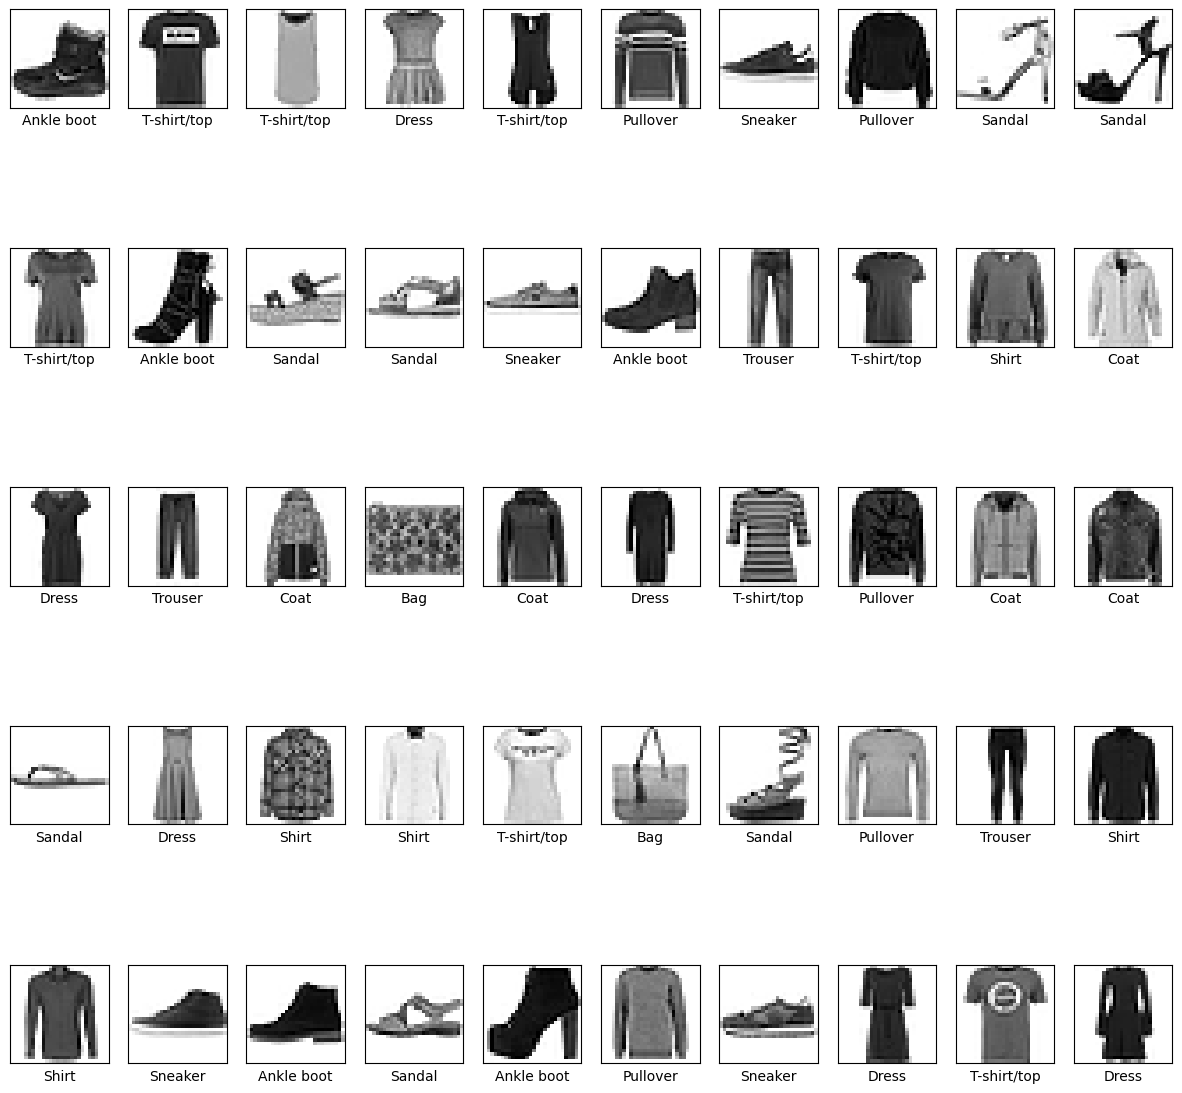

In [17]:
plt.figure(figsize=(15, 15))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Y[i]])
plt.show()



4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en
una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe
convertir su tipo a float32, y también debe volver a escalar los valores
de píxel en el rango 0 - 1 inclusive.

In [18]:
# Convertir el tipo de datos a float32 y escalar los valores de píxel en el rango 0-1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Agregar una dimensión extra a las imágenes
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Verificar las dimensiones de las imágenes después de la conversión
print("Dimensiones de las imágenes de entrenamiento:", train_images.shape)
print("Dimensiones de las imágenes de prueba:", test_images.shape)


Dimensiones de las imágenes de entrenamiento: (60000, 28, 28, 1)
Dimensiones de las imágenes de prueba: (10000, 28, 28, 1)


En este código, se utiliza astype('float32') para cambiar el tipo de datos de las imágenes a float32. Luego, se divide cada valor de píxel por 255.0 para reescalarlos en el rango de 0 a 1. Posteriormente, se agrega una dimensión adicional a las imágenes utilizando np.expand_dims() para que tengan una forma de 28x28x1.
Al final, se imprime la forma de las imágenes de entrenamiento y de prueba para verificar que ahora tengan las dimensiones requeridas.

5. Convierta las etiquetas de entrenamiento y prueba en vectores de
codificación one-hot.

In [19]:
# Convertir las etiquetas de entrenamiento y prueba en vectores one-hot
train_labels_one_hot = tf.keras.utils.to_categorical(train_labels)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels)

# Verificar las dimensiones de las etiquetas one-hot
print("Dimensiones de las etiquetas one-hot de entrenamiento:",
    train_labels_one_hot.shape)
print("Dimensiones de las etiquetas one-hot de prueba:", test_labels_one_hot.shape)


Dimensiones de las etiquetas one-hot de entrenamiento: (60000, 10)
Dimensiones de las etiquetas one-hot de prueba: (10000, 10)


6. Separar datos de entrenamiento y testeo

In [20]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y testeo
train_X, test_X, train_Y, test_Y = train_test_split(
    train_X, train_Y, 
    test_size=0.2, 
    random_state=42)

# Verificar los tamaños de los conjuntos de entrenamiento y testeo
print("Tamaño de los datos de entrenamiento:", len(train_X))
print("Tamaño de los datos de prueba:", len(test_Y))


Tamaño de los datos de entrenamiento: 48000
Tamaño de los datos de prueba: 12000


7. Para modelar sus datos, utilice los siguientes paquetes:
Usará un tamaño de lote de 64 y también es preferible usar un tamaño
de lote más alto de 128 o 256, todo depende de la memoria. Contribuye
enormemente a determinar los parámetros de aprendizaje y afecta la
precisión de la predicción. Entrenarás la red durante 20 épocas.

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU


In [1]:
from sklearn.datasets import load_digits
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import warnings
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
warnings.filterwarnings('ignore')

batch_size = 64
epochs = 20
num_classes = 10

# Definir el modelo
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(28, 28, 1), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2, 2), padding='same')
model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2, 2), padding='same')
model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2, 2), padding='same')
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(num_classes, activation='softmax'))


2023-05-31 16:08:56.298708: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'Conv2D' is not defined

9. Compilación y visualización del modelo

In [ ]:
# Compiliar el modelo

model.compile(
    optimizer = keras.optimizer.adam(),
    loss = keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)


In [ ]:
# Visualizaciónd de la arquitectura de datos

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [26]:
# Entrenar el modelo

history = model.fit(train_X, train_Y, 
    validation_split=0.2,
    epochs=epochs, 
    batch_size=batch_size, 
    verbose=1
)


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [27]:
# Evaluar el modelo de los datos

test_loss, test_acc = model.evaluate(test_X, test_Y, verbose = 0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()
